https://fehiepsi.github.io/rethinking-numpyro/03-sampling-the-imaginary.html

Starting a second  notebook to incorporate updates

In [1]:
!pip install -q numpyro arviz

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.1 which is incompatible.
jupyterlab 4.2.4 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.2 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.4 requires shapely<2.1,>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.

In [2]:
import os

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

import jax.numpy as jnp
from jax import random, vmap

import numpyro
import numpyro.distributions as dist

if "SVG" in os.environ:
    %config InlineBackend.figure_formats = ["svg"]
az.style.use("arviz-darkgrid")
numpyro.set_platform("cpu")

In [3]:
dist.Binomial(total_count=2, probs=0.7).sample(random.PRNGKey(2), (10,))

Array([2, 1, 2, 1, 1, 2, 2, 2, 2, 1], dtype=int32, weak_type=True)

In [7]:
dummy_w = dist.Binomial(total_count=2, probs=0.7).sample(random.PRNGKey(0), (100000,))
jnp.unique(dummy_w, return_counts=True)[1] / 1e5

Array([0.0888 , 0.41789, 0.49331], dtype=float32, weak_type=True)

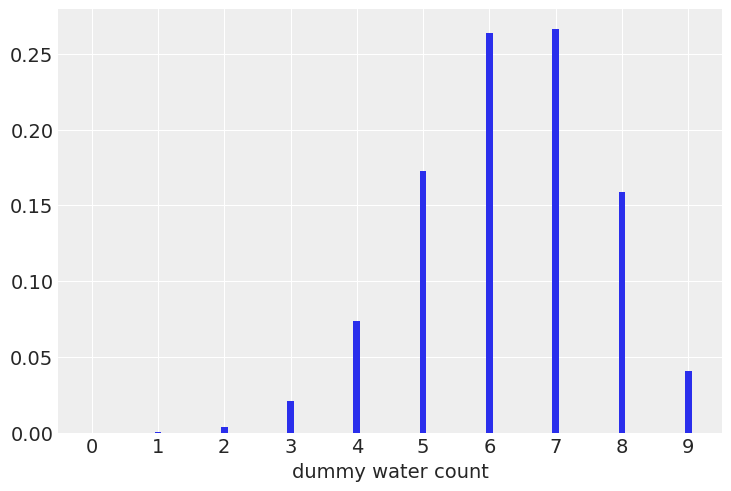

In [8]:
dummy_w = dist.Binomial(total_count=9, probs=0.7).sample(random.PRNGKey(0), (100000,))
ax = az.plot_dist(np.asarray(dummy_w), kind="hist", hist_kwargs={"rwidth": 0.1})
ax.set_xlabel("dummy water count", fontsize=14)
plt.show()

In [9]:
w = dist.Binomial(total_count=9, probs=0.6).sample(random.PRNGKey(0), (int(1e4),))

In [11]:
p_grid = jnp.linspace(start=0, stop=1, num=1000)
prior = jnp.repeat(1, 1000)
likelihood = jnp.exp(dist.Binomial(total_count=3, probs=p_grid).log_prob(3))
posterior = likelihood * prior
posterior = posterior / jnp.sum(posterior)
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (10000,))]

In [12]:
w = dist.Binomial(total_count=9, probs=samples).sample(random.PRNGKey(0))